In [2]:
# reloading for modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# ignore some unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import the needed modules
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

In [165]:
def k_clique_communities(G, k=3):
    # 1: find all maximal cliques
    cliques = list(nx.find_cliques(G))
    
    print(cliques)

    # 2: create clique overlap matrix
    num_of_cliques = len(cliques)
    matrix = np.zeros((num_of_cliques,num_of_cliques))
    for i in range(0,num_of_cliques):
        for j in range(0,num_of_cliques):
            for v in cliques[i]:
                if v in cliques[j]:
                    matrix[i,j] += 1
    
    # 3: threshold matrix with k
    for i in range(0,num_of_cliques):
        for j in range(0,num_of_cliques):
            if (matrix[i,j] < k-1) or (i == j and matrix[i,j] < k):
                matrix[i,j] = 0
            else:
                matrix[i,j] = 1
                
    print(matrix)
    
    # 4: combine connected components
    communities = list()
    # TODO: Complete ---
    pass
    # ------------------
    
    
    return communities

[[1, 0, 6], [1, 2], [3, 0, 6], [3, 4, 2], [3, 4, 5], [3, 6, 5]]
[[1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 1.]]
0 [ 0 -1  0 -1 -1 -1]
2 [ 0 -1  0 -1 -1  0]
3 [ 0 -1  0  1  1  0]
4 [ 0 -1  0  1  0  0]
5 [ 0 -1  0  1  0  0]
[{0, 1, 2, 3, 4, 5, 6}, {2, 3, 4, 5}]
[frozenset({0, 1, 2, 3, 4, 5, 6})]


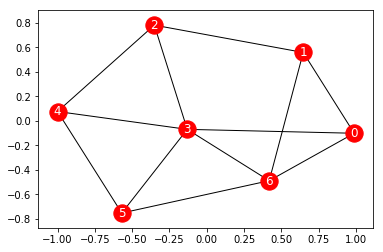

In [166]:
from networkx.algorithms.community import k_clique_communities as nx_k_clique_communities
### Graph G
#G = nx.read_edgelist("communities.txt")
#G = nx.gnm_random_graph(7,12)
G=nx.Graph()

G.add_edge(0, 1)
G.add_edge(0, 6)
G.add_edge(0, 3)
G.add_edge(1, 2)
G.add_edge(1, 6)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(3, 6)
G.add_edge(4, 5)
G.add_edge(5, 6)

pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos, font_color='white')

print(k_clique_communities(G,3))
print(list(nx_k_clique_communities(G,3)))